# Show behavior predictions for specific neural models

In [1]:
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import linear_model
import sys

from disp import set_plot
from my_torch import skl_fit_ridge

cc = np.concatenate

STRAINS = ['NM91', 'ZH23']
PTRAIN = .8
NSPLIT = 30

FIT_LIN = skl_fit_ridge

ALPHA = 10

FPS = 30.03

In [2]:
FSTRAIN = 'data/simple/strains.csv'

MSTRAINS = [(pd.read_csv(FSTRAIN)['STRAIN'] == strain) for strain in STRAINS]
MSTRAIN = np.any(MSTRAINS, axis=0)
ISTRAIN = MSTRAIN.nonzero()[0]

NTR = MSTRAIN.sum()
NTRAIN = int(round(PTRAIN*NTR))

# Population MA model predicting motion

In [3]:
TARG_BHV = 'MTN'
LABELS = {
    'MTN': 'Motion',
}

LOAD_DIR, NRL_MDL = 'neur_basic', 'ma'

FSAVE = f'data/simple/mlv/{LOAD_DIR}/baker_{NRL_MDL}_{"_".join(STRAINS).lower()}_{TARG_BHV.lower()}_ridge_alpha_{ALPHA}_masked.npy'

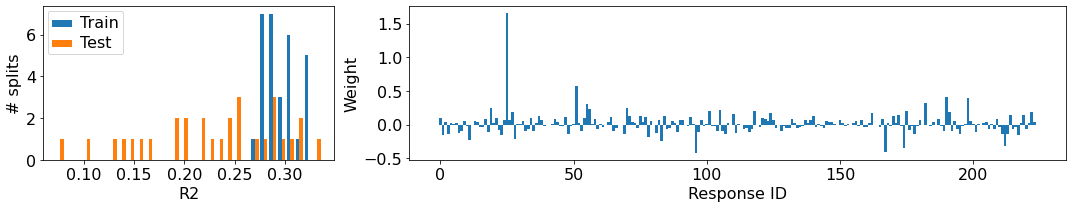

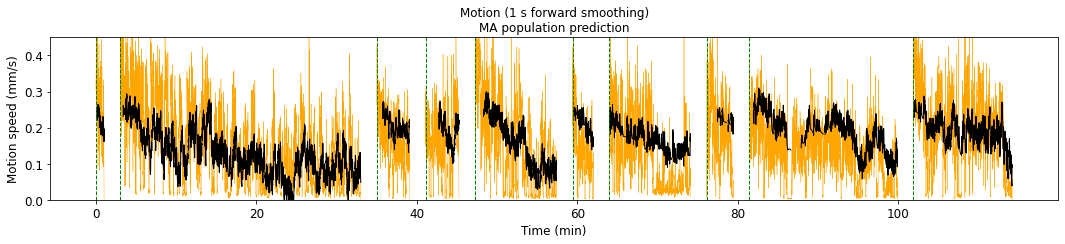

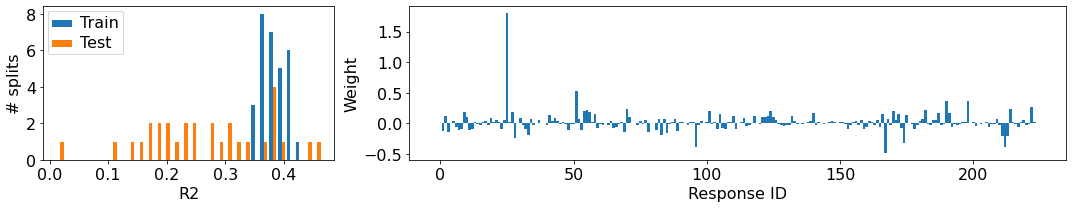

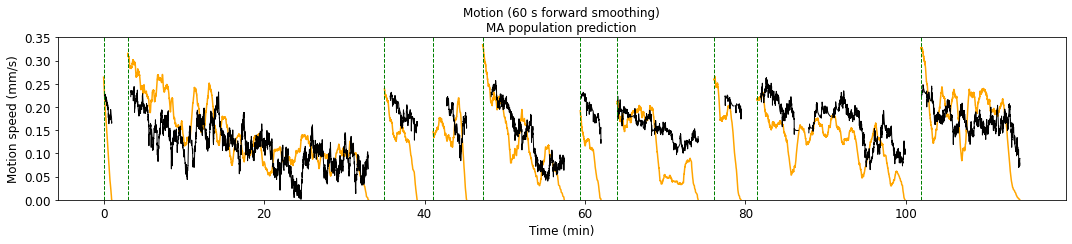

In [4]:
TWDWS = [1, 60]

LWS = [.4, 1.5]

Y_LIMS = [(0, 0.45), (0, 0.35)]

data = np.load(FSAVE, allow_pickle=True)[0]

for twdw, lw, y_lim in zip(TWDWS, LWS, Y_LIMS):
    targ = f'{TARG_BHV}_MN_{twdw}'
    
    gs = gridspec.GridSpec(1, 3)

    fig = plt.figure(figsize=(15, 3), tight_layout=True)
    axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

    axs[0].hist(np.transpose([data['r2_train'][targ], data['r2_test'][targ]]), bins=30)
    axs[0].legend(['Train', 'Test'])
    set_plot(axs[0], x_label='R2', y_label='# splits', font_size=16)

    axs[1].bar(np.arange(data['w'][targ].shape[1]), np.mean(data['w'][targ], axis=0), width=1)
    set_plot(axs[1], x_label='Response ID', y_label='Weight', font_size=16)

    ISPLIT = 0
    TEST_ITRS = [0, 3, 4, 5, 6, 7, 8, 9, 13, 15]

    fig, ax = plt.subplots(1, 1, figsize=(15, 3.5), tight_layout=True)
    t_offset = 0
    t_spacing = 120

    for itr in TEST_ITRS:
        y = data['ys_test'][targ][ISPLIT][itr]
        y_hat = data['y_hats_test'][targ][ISPLIT][itr]
        t = np.arange(len(y))/FPS

        ax.plot((t + t_offset)/60, y, c='orange', lw=lw)
        ax.plot((t + t_offset)/60, y_hat, c='k', lw=1)
        
        ax.axvline(t_offset/60, lw=1, color='g', ls='--')

        t_offset += t[-1] + t_spacing

    set_plot(ax, y_lim=y_lim, x_label='Time (min)', y_label=f'{LABELS[TARG_BHV]} speed (mm/s)', title=f'{LABELS[TARG_BHV]} ({twdw} s forward smoothing)\n{NRL_MDL.upper()} population prediction', font_size=12)

## Slow int, fast adapt

In [9]:
TARG_BHV = 'MTN'
LABELS = {
    'MTN': 'Motion',
}

LOAD_DIR, NRL_MDL = 'ma_pert', 'ma_slow_r_fast_a'

FSAVE = f'data/simple/mlv/{LOAD_DIR}/baker_{NRL_MDL}_{"_".join(STRAINS).lower()}_{TARG_BHV.lower()}_ridge_alpha_{ALPHA}_masked.npy'

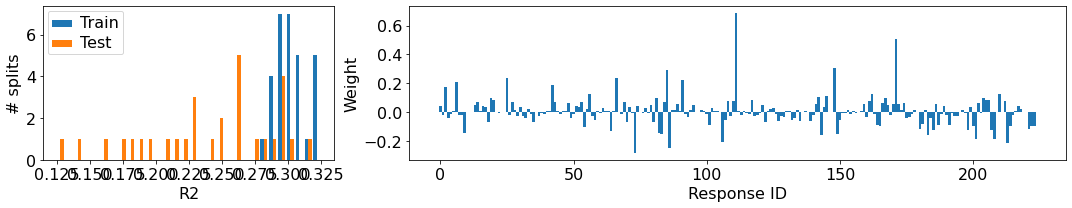

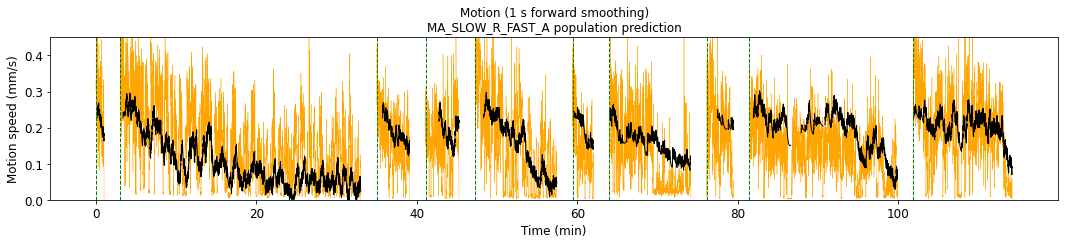

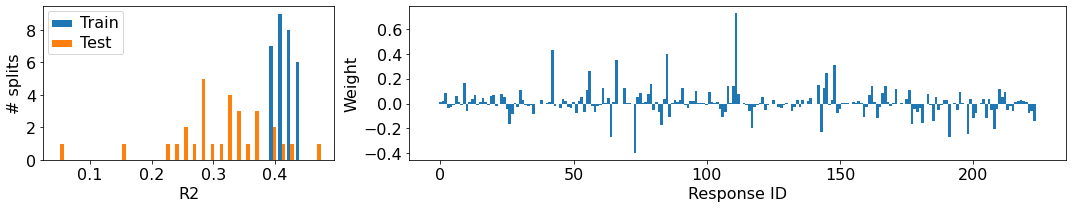

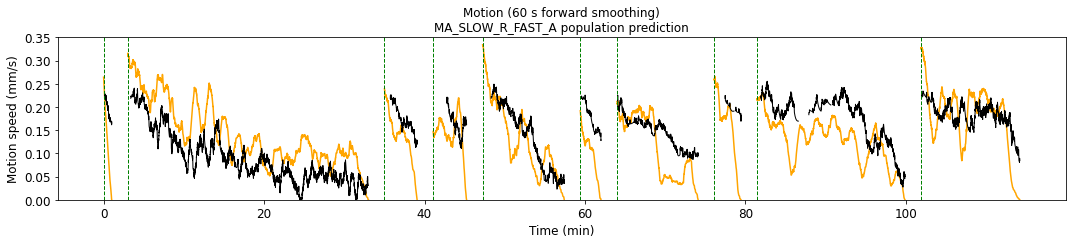

In [10]:
TWDWS = [1, 60]

LWS = [.4, 1.5]

Y_LIMS = [(0, 0.45), (0, 0.35)]

data = np.load(FSAVE, allow_pickle=True)[0]

for twdw, lw, y_lim in zip(TWDWS, LWS, Y_LIMS):
    targ = f'{TARG_BHV}_MN_{twdw}'
    
    gs = gridspec.GridSpec(1, 3)

    fig = plt.figure(figsize=(15, 3), tight_layout=True)
    axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

    axs[0].hist(np.transpose([data['r2_train'][targ], data['r2_test'][targ]]), bins=30)
    axs[0].legend(['Train', 'Test'])
    set_plot(axs[0], x_label='R2', y_label='# splits', font_size=16)

    axs[1].bar(np.arange(data['w'][targ].shape[1]), np.mean(data['w'][targ], axis=0), width=1)
    set_plot(axs[1], x_label='Response ID', y_label='Weight', font_size=16)

    ISPLIT = 0
    TEST_ITRS = [0, 3, 4, 5, 6, 7, 8, 9, 13, 15]

    fig, ax = plt.subplots(1, 1, figsize=(15, 3.5), tight_layout=True)
    t_offset = 0
    t_spacing = 120

    for itr in TEST_ITRS:
        y = data['ys_test'][targ][ISPLIT][itr]
        y_hat = data['y_hats_test'][targ][ISPLIT][itr]
        t = np.arange(len(y))/FPS

        ax.plot((t + t_offset)/60, y, c='orange', lw=lw)
        ax.plot((t + t_offset)/60, y_hat, c='k', lw=1)
        
        ax.axvline(t_offset/60, lw=1, color='g', ls='--')

        t_offset += t[-1] + t_spacing

    set_plot(ax, y_lim=y_lim, x_label='Time (min)', y_label=f'{LABELS[TARG_BHV]} speed (mm/s)', title=f'{LABELS[TARG_BHV]} ({twdw} s forward smoothing)\n{NRL_MDL.upper()} population prediction', font_size=12)

## Med-slow int, fast-med adapt

In [11]:
TARG_BHV = 'MTN'
LABELS = {
    'MTN': 'Motion',
}

LOAD_DIR, NRL_MDL = 'ma_pert', 'ma_medslow_r_fastmed_a'

FSAVE = f'data/simple/mlv/{LOAD_DIR}/baker_{NRL_MDL}_{"_".join(STRAINS).lower()}_{TARG_BHV.lower()}_ridge_alpha_{ALPHA}_masked.npy'

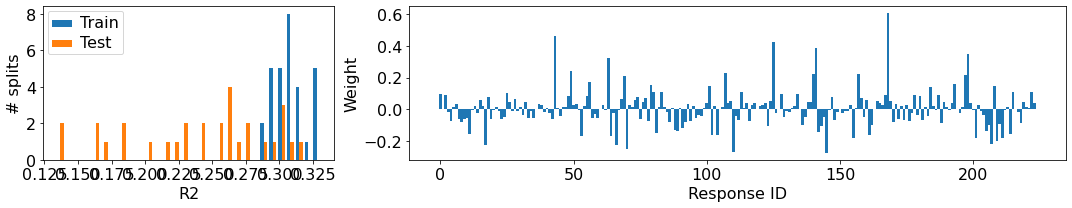

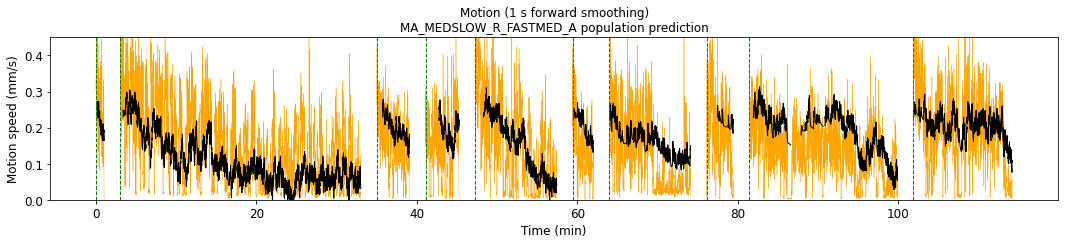

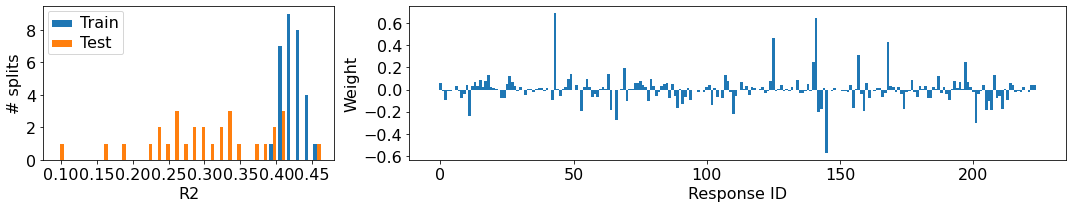

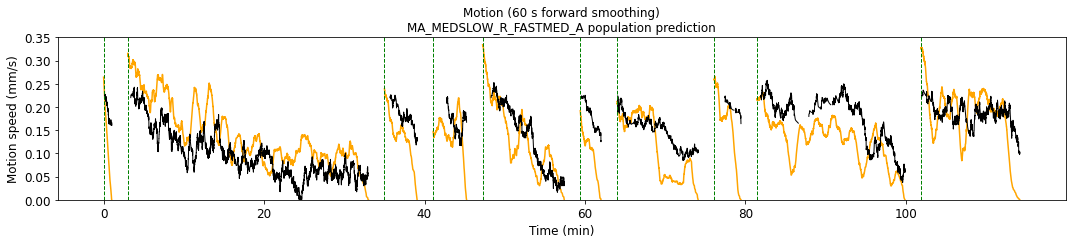

In [12]:
TWDWS = [1, 60]

LWS = [.4, 1.5]

Y_LIMS = [(0, 0.45), (0, 0.35)]

data = np.load(FSAVE, allow_pickle=True)[0]

for twdw, lw, y_lim in zip(TWDWS, LWS, Y_LIMS):
    targ = f'{TARG_BHV}_MN_{twdw}'
    
    gs = gridspec.GridSpec(1, 3)

    fig = plt.figure(figsize=(15, 3), tight_layout=True)
    axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

    axs[0].hist(np.transpose([data['r2_train'][targ], data['r2_test'][targ]]), bins=30)
    axs[0].legend(['Train', 'Test'])
    set_plot(axs[0], x_label='R2', y_label='# splits', font_size=16)

    axs[1].bar(np.arange(data['w'][targ].shape[1]), np.mean(data['w'][targ], axis=0), width=1)
    set_plot(axs[1], x_label='Response ID', y_label='Weight', font_size=16)

    ISPLIT = 0
    TEST_ITRS = [0, 3, 4, 5, 6, 7, 8, 9, 13, 15]

    fig, ax = plt.subplots(1, 1, figsize=(15, 3.5), tight_layout=True)
    t_offset = 0
    t_spacing = 120

    for itr in TEST_ITRS:
        y = data['ys_test'][targ][ISPLIT][itr]
        y_hat = data['y_hats_test'][targ][ISPLIT][itr]
        t = np.arange(len(y))/FPS

        ax.plot((t + t_offset)/60, y, c='orange', lw=lw)
        ax.plot((t + t_offset)/60, y_hat, c='k', lw=1)
        
        ax.axvline(t_offset/60, lw=1, color='g', ls='--')

        t_offset += t[-1] + t_spacing

    set_plot(ax, y_lim=y_lim, x_label='Time (min)', y_label=f'{LABELS[TARG_BHV]} speed (mm/s)', title=f'{LABELS[TARG_BHV]} ({twdw} s forward smoothing)\n{NRL_MDL.upper()} population prediction', font_size=12)

## Med int, med adapt

In [15]:
TARG_BHV = 'MTN'
LABELS = {
    'MTN': 'Motion',
}

LOAD_DIR, NRL_MDL = 'ma_pert', 'ma_med_r_fast_a'

FSAVE = f'data/simple/mlv/{LOAD_DIR}/baker_{NRL_MDL}_{"_".join(STRAINS).lower()}_{TARG_BHV.lower()}_ridge_alpha_{ALPHA}_masked.npy'

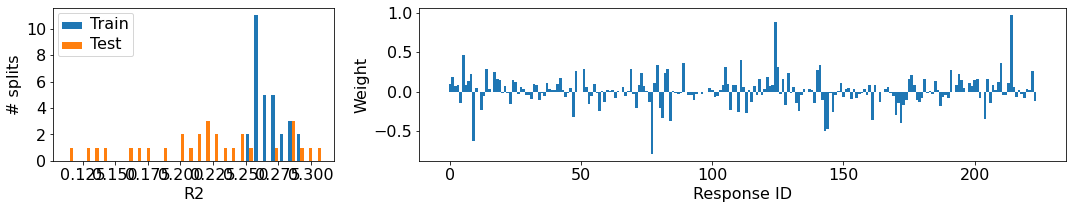

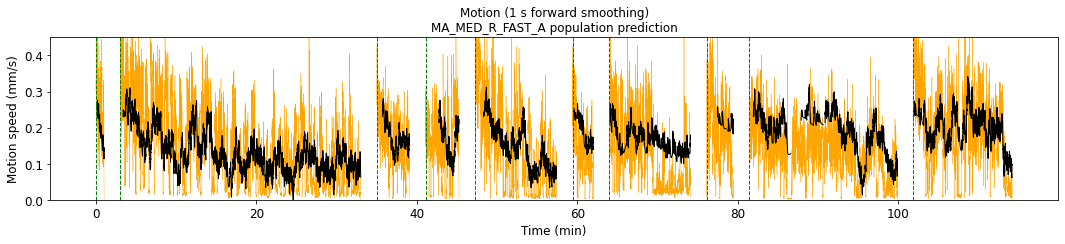

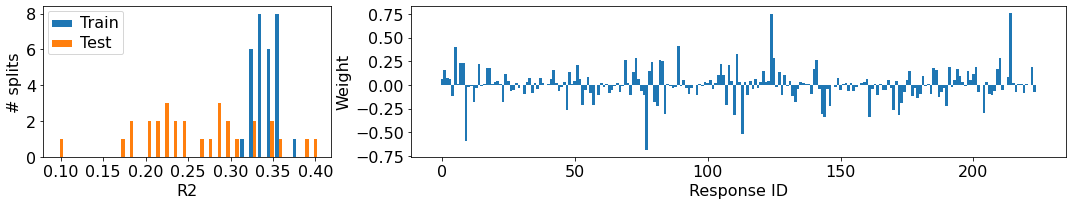

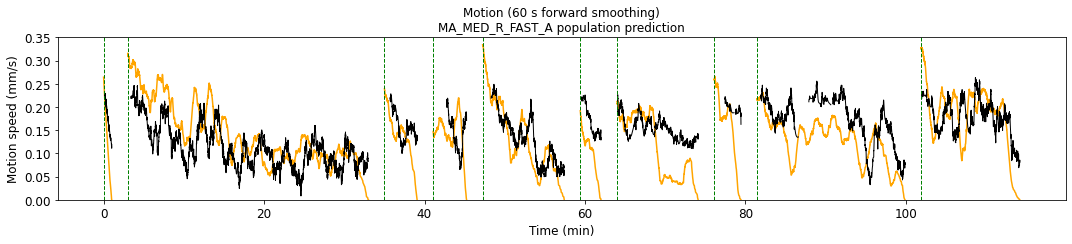

In [16]:
TWDWS = [1, 60]

LWS = [.4, 1.5]

Y_LIMS = [(0, 0.45), (0, 0.35)]

data = np.load(FSAVE, allow_pickle=True)[0]

for twdw, lw, y_lim in zip(TWDWS, LWS, Y_LIMS):
    targ = f'{TARG_BHV}_MN_{twdw}'
    
    gs = gridspec.GridSpec(1, 3)

    fig = plt.figure(figsize=(15, 3), tight_layout=True)
    axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

    axs[0].hist(np.transpose([data['r2_train'][targ], data['r2_test'][targ]]), bins=30)
    axs[0].legend(['Train', 'Test'])
    set_plot(axs[0], x_label='R2', y_label='# splits', font_size=16)

    axs[1].bar(np.arange(data['w'][targ].shape[1]), np.mean(data['w'][targ], axis=0), width=1)
    set_plot(axs[1], x_label='Response ID', y_label='Weight', font_size=16)

    ISPLIT = 0
    TEST_ITRS = [0, 3, 4, 5, 6, 7, 8, 9, 13, 15]

    fig, ax = plt.subplots(1, 1, figsize=(15, 3.5), tight_layout=True)
    t_offset = 0
    t_spacing = 120

    for itr in TEST_ITRS:
        y = data['ys_test'][targ][ISPLIT][itr]
        y_hat = data['y_hats_test'][targ][ISPLIT][itr]
        t = np.arange(len(y))/FPS

        ax.plot((t + t_offset)/60, y, c='orange', lw=lw)
        ax.plot((t + t_offset)/60, y_hat, c='k', lw=1)
        
        ax.axvline(t_offset/60, lw=1, color='g', ls='--')

        t_offset += t[-1] + t_spacing

    set_plot(ax, y_lim=y_lim, x_label='Time (min)', y_label=f'{LABELS[TARG_BHV]} speed (mm/s)', title=f'{LABELS[TARG_BHV]} ({twdw} s forward smoothing)\n{NRL_MDL.upper()} population prediction', font_size=12)